<br>
<hr>

<div style="text-align: justify;">
<br>
<center><div><b style="font-size:21px;">Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria</b></div></center>
<center><div><b style="font-size:22px;color:#72849d">Redes Bayesianas Gaussianas aplicada à predição de vendas em uma grande rede de fast-food brasileira</b></div></center>
<br>
<div style="text-align: justify;">
Resultados apresentados ao Instituto de Ciências Matemáticas e de Computação - ICMC-USP, como parte dos requisitos para obtenção do título de mestre - Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria, sob orientação do <a href="http://conteudo.icmc.usp.br/pessoas/alneu/" target="_blank"> Prof. Dr. Alneu de Andrade Lopes</a> e Co-Orientação <a href="https://scholar.google.com/citations?user=tuOaq-4AAAAJ&hl=pt-BR" target="_blank">Dr. Brett Drury.</a>
</div>
<br>
<hr>
<center><div><b style="font-size:22px;">Previsão de Vendas - Grupo de Sanduíche - SP</b></div></center>
<hr>

In [319]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import pyflux as pf
from pyramid.arima import auto_arima
from scipy import stats

plt.style.use('seaborn')

In [42]:
data = pd.read_excel('data/food-sp.xlsx')

In [43]:
data.columns.values

array(['UF', 'DATA', 'VENDA', 'ADICIONAL', 'BRINDE', 'MOLHO FESTIVAL',
       'CHOPP COM UNIDADE EM LITRO', 'BEBIDA COM UNIDADE EM LITRO',
       'BEX SALADAS', 'DOCE E TORTA', 'BEBIDA', 'MOLHO',
       'GELADO E MILK SHAKE', 'ITENS DE COMPOSIÇÃO', 'BEX SNACKS',
       'BEX DOCES', 'BEX SANDUICHES E MOLHOS', 'SACHET MOLHO PINCANHA',
       'BEX GELADOS E MILKSHAKES', 'BEX CAFE', 'PROJETO CAFÉ',
       'PROJETO CHOPP', 'PRATO', 'BEX BEBIDAS', 'LANCHE FRANQUEADO',
       'ACOMPANHAMENTO', 'SANDUICHE', 'LINHA ORIGINAL', 'OUTROS',
       'CALDA BOBS TOP', 'REFEICAO COLABORADORES'], dtype=object)

In [313]:
variavel = 'SANDUICHE'

In [314]:
data.index = data['DATA']

In [315]:
df_train = data.iloc[1:84,]
df_test = data.iloc[84:96,] 

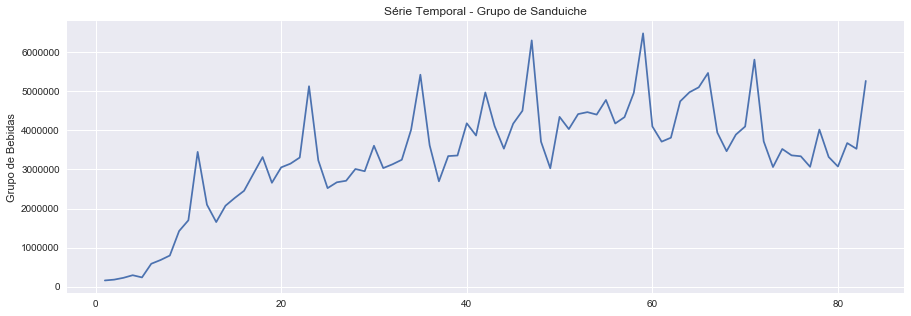

In [316]:
plt.figure(figsize=(15,5))
plt.plot(list(range(1,84)), df_train[variavel])
plt.ylabel('Grupo de Bebidas')
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()

In [320]:
df_train[variavel+'_box'], lmbda = stats.boxcox(df_train[variavel])

In [531]:
model = auto_arima(df_train[variavel+'_box'], 
                    n_fits=12,
                    start_p=0, 
                    start_q=0, 
                    max_p=5, 
                    max_q=5, 
                    m=20,
                    start_P=0, 
                    d=1, 
                    D=1, 
                    trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=True)  # set to stepwise

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 20); AIC=2250.016, BIC=2259.691, Fit time=0.378 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 20); AIC=2265.278, BIC=2272.534, Fit time=0.087 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2245.501, BIC=2257.596, Fit time=0.536 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2248.809, BIC=2258.485, Fit time=0.466 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2245.050, BIC=2259.563, Fit

In [532]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   83
Model:             SARIMAX(4, 1, 0)x(2, 1, 1, 20)   Log Likelihood               -1101.076
Date:                            Sat, 10 Mar 2018   AIC                           2220.151
Time:                                    23:25:21   BIC                           2241.921
Sample:                                         0   HQIC                          2228.897
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.615e+06   4.24e+06     -0.617      0.537   -1.09e+07    5.69e+06
ar.L1         -0.5138      0.199     -2.579      0.010      -0.904      -0.123
ar.L2         -0.4365      0.265     -1.647      0.100      -0.956       0.083
ar.L3         -0.4357      0.254     -1.715      0.086      -0.934       0.062
ar.L4         -0.5524      0.212     -2.605      0.009      -0.968      -0.137
ar.S.L20      -0.5941      1.107     -0.537      0.592      -2.764       1.576
ar.S.L40      -0.3851      0.616     -0.625      0.532      -1.593       0.823
ma.S.L20      -0.1677      1.202     -0.139      0.889      -2.523       2.188
sigma2      2.175e+14      0.145    1.5e+15      0.000    2.17e+14    2.17e+14
===================================================================================
Ljung-Box (Q):                       91.38   Jarque-Bera (JB):                 3.69
Prob(Q):                              0.00   Prob(JB):                         0.16
Heteroskedasticity (H):               0.70   Skew:                             0.59
Prob(H) (two-sided):                  0.43   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.18e+41. Standard errors may be unstable.
"""

In [533]:
forecast = model.predict(n_periods=12)
forecast

array([45923951.50038445, 38394314.91380171, 45288753.06186566,
       42074253.7626654 , 39435632.8292001 , 35901411.40496427,
       41514578.07587926, 44858803.32873087, 33668686.51148195,
       34265042.30892813, 40843162.79142638, 49081424.88579693])

In [534]:
len(df_test[variavel].values)

12

In [535]:
len(forecast)

12

In [536]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [537]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [538]:
y_pred = invboxcox(forecast,lmbda)
y_true = df_test[variavel].values

<h1>Acurácia</h1>

In [539]:
acuracia = round(100 - mean_absolute_percentage_error(y_true , y_pred),0)
acuracia

89.0

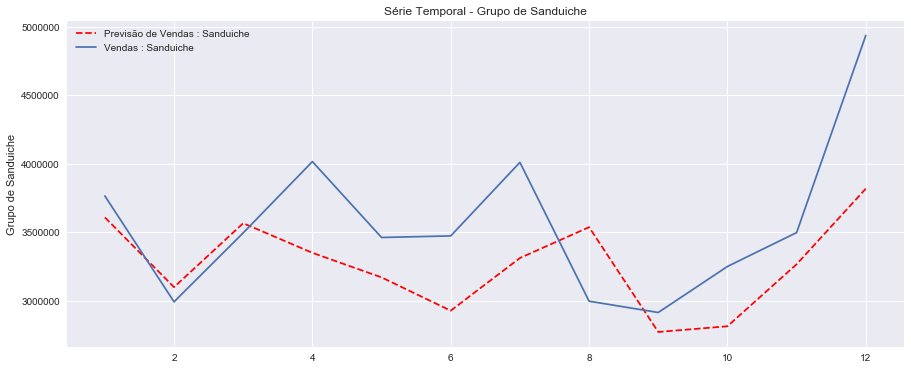

In [540]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), y_pred, '--', label='Previsão de Vendas : '+ variavel.title() ,color='r')
plt.legend()
plt.plot(list(range(1,13)), y_true, label='Vendas : '+ variavel.title())
plt.legend()
plt.ylabel('Grupo de '+ variavel.title())
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()